In [ ]:
import numpy as np  # Import library numpy untuk operasi numerik
import pandas as pd  # Import library pandas untuk manipulasi data
import tensorflow as tf

In [ ]:
import json  # Import library json untuk membaca data dari file JSON

with open('dataset.json', 'r') as f:
    data = json.load(f)  # Membaca data dari file JSON dan menyimpannya dalam variabel 'data'

df = pd.DataFrame(data['intents'])  # Membuat DataFrame dari bagian 'intents' dalam data JSON
df

,tag,patterns,responses
0,greeting,"[Hai, Hey, Apakah ada orang di sini?, Woy, Hel...",[Halo. Ceritakan bagaimana perasaanmu hari ini...
1,morning,"[Pagi, Selamat pagi, Morning, Good morning]",[Selamat pagi. Saya harap tidur malam Anda nye...
2,afternoon,"[Siang, Selamat siang, Afternoon, Good afternoon]","[Selamat siang. Bagaimana harimu?, Hai, semoga..."
3,evening,"[Selamat malam, Malam, Evening]","[Selamat malam. Bagaimana harimu?, Hai, semoga..."
4,night,"[Selamat malam, Malam, Night, Good night]","[Selamat malam. Tidurlah yang nyenyak, Selamat..."
...,...,...,...
77,fact-30,[Bagaimana cara menjaga koneksi sosial? Bagaim...,"[Banyak orang berada sendirian saat ini, tetap..."
78,fact-31,[Apa perbedaan antara kecemasan dan stres?],[Stres dan kecemasan sering digunakan secara b...
79,fact-32,"[Apa perbedaan antara kesedihan dan depresi?, ...",[Kesedihan adalah reaksi normal terhadap kehil...
80,fact-33,[Apa saja tanda-tanda gangguan kecemasan umum?],[Gangguan kecemasan umum ditandai oleh kecemas...


In [ ]:
dic = {"tag":[], "patterns":[], "responses":[]}  # Membuat dictionary kosong untuk menyimpan data yang akan diubah ke DataFrame
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]  # Mengambil pola (patterns) dari DataFrame
    rspns = df[df.index == i]['responses'].values[0]  # Mengambil respons dari DataFrame
    tag = df[df.index == i]['tag'].values[0]  # Mengambil tag dari DataFrame
    for j in range(len(ptrns)):
        dic['tag'].append(tag)  # Menambahkan tag ke dalam dictionary
        dic['patterns'].append(ptrns[j])  # Menambahkan pola ke dalam dictionary
        dic['responses'].append(rspns)  # Menambahkan respons ke dalam dictionary

df = pd.DataFrame.from_dict(dic)  # Membuat DataFrame baru dari dictionary
pd.set_option("display.max_rows", None)  # Menampilkan semua baris DataFrame ketika ditampilkan
df  # Menampilkan DataFrame


,tag,patterns,responses
0,greeting,Hai,[Halo. Ceritakan bagaimana perasaanmu hari ini...
1,greeting,Hey,[Halo. Ceritakan bagaimana perasaanmu hari ini...
2,greeting,Apakah ada orang di sini?,[Halo. Ceritakan bagaimana perasaanmu hari ini...
3,greeting,Woy,[Halo. Ceritakan bagaimana perasaanmu hari ini...
4,greeting,Hello,[Halo. Ceritakan bagaimana perasaanmu hari ini...
5,greeting,Halo,[Halo. Ceritakan bagaimana perasaanmu hari ini...
6,greeting,Howdy,[Halo. Ceritakan bagaimana perasaanmu hari ini...
7,greeting,Hola,[Halo. Ceritakan bagaimana perasaanmu hari ini...
8,greeting,Bonjour,[Halo. Ceritakan bagaimana perasaanmu hari ini...
9,greeting,Konnichiwa,[Halo. Ceritakan bagaimana perasaanmu hari ini...


In [ ]:
df.to_excel('dataset.xlsx', index=False)

In [ ]:
df['tag'].unique()

array(['greeting', 'morning', 'afternoon', 'evening', 'night', 'goodbye',
       'thanks', 'no-response', 'neutral-response', 'about', 'skill',
       'creation', 'name', 'help', 'sad', 'stressed', 'worthless',
       'depressed', 'happy', 'casual', 'anxious', 'not-talking', 'sleep',
       'scared', 'death', 'understand', 'done', 'suicide', 'hate-you',
       'hate-me', 'default', 'jokes', 'repeat', 'wrong', 'stupid',
       'location', 'something-else', 'friends', 'ask', 'problem',
       'no-approach', 'learn-more', 'user-agree', 'meditation',
       'user-meditation', 'pandora-useful', 'user-advice',
       'learn-mental-health', 'mental-health-fact', 'fact-1', 'fact-2',
       'fact-3', 'fact-5', 'fact-6', 'fact-7', 'fact-8', 'fact-9',
       'fact-10', 'fact-11', 'fact-12', 'fact-13', 'fact-14', 'fact-15',
       'fact-16', 'fact-17', 'fact-18', 'fact-19', 'fact-20', 'fact-21',
       'fact-22', 'fact-23', 'fact-24', 'fact-25', 'fact-26', 'fact-27',
       'fact-28', 'fact-29', '

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(lower=True, split=' ')
tokenizer.fit_on_texts(df['patterns'])
tokenizer.get_config()

{'num_words': None,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'lower': True,
 'split': ' ',
 'char_level': False,
 'oov_token': None,
 'document_count': 274,
 'word_counts': '{"hai": 1, "hey": 1, "apakah": 12, "ada": 12, "orang": 2, "di": 2, "sini": 1, "woy": 1, "hello": 1, "halo": 1, "howdy": 1, "hola": 1, "bonjour": 1, "konnichiwa": 1, "guten": 1, "tag": 1, "ola": 1, "apa": 36, "kabar": 1, "pagi": 2, "selamat": 7, "morning": 2, "good": 3, "siang": 2, "afternoon": 2, "malam": 4, "evening": 1, "night": 2, "tinggal": 3, "sampai": 5, "jumpa": 5, "lagi": 11, "au": 1, "revoir": 1, "sayonara": 1, "oke": 3, "jalan": 1, "besok": 1, "bertemu": 1, "lain": 4, "waktu": 1, "terima": 5, "kasih": 5, "makasih": 1, "sangat": 10, "membantu": 2, "untuk": 15, "bantuannya": 1, "banyak": 8, "thank": 1, "you": 1, "tidak": 44, "yang": 38, "menarik": 1, "siapa": 10, "kamu": 34, "itu": 18, "ceritakan": 4, "padaku": 1, "lebih": 7, "tentang": 14, "dirimu": 2, "namamu": 2, "aku": 53, "harus": 5, "meman

In [ ]:
vocab_size = len(tokenizer.word_index)  # Menghitung jumlah kata unik dalam tokenizer
print('number of unique words = ', vocab_size)  # Menampilkan jumlah kata unik

number of unique words =  332


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

ptrn2seq = tokenizer.texts_to_sequences(df['patterns'])  # Mengonversi teks pola menjadi urutan angka
X = pad_sequences(ptrn2seq, padding='post')  # Melakukan padding terhadap urutan angka
print('X shape = ', X.shape)  # Menampilkan bentuk (shape) dari X

lbl_enc = LabelEncoder()  # Membuat objek LabelEncoder
y = lbl_enc.fit_transform(df['tag'])  # Mengonversi label kelas menjadi angka
print('y shape = ', y.shape)  # Menampilkan bentuk (shape) dari y
print('num of classes = ', len(np.unique(y)))  # Menampilkan jumlah kelas unik

X shape =  (274, 17)
y shape =  (274,)
num of classes =  82


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 17, 100)           33300     
                                                                 
 lstm_3 (LSTM)               (None, 17, 32)            17024     
                                                                 
 layer_normalization_5 (Lay  (None, 17, 32)            64        
 erNormalization)                                                
                                                                 
 lstm_4 (LSTM)               (None, 17, 32)            8320      
                                                                 
 layer_normalization_6 (Lay  (None, 17, 32)            64        
 erNormalization)                                                
                                                                 
 lstm_5 (LSTM)               (None, 32)               

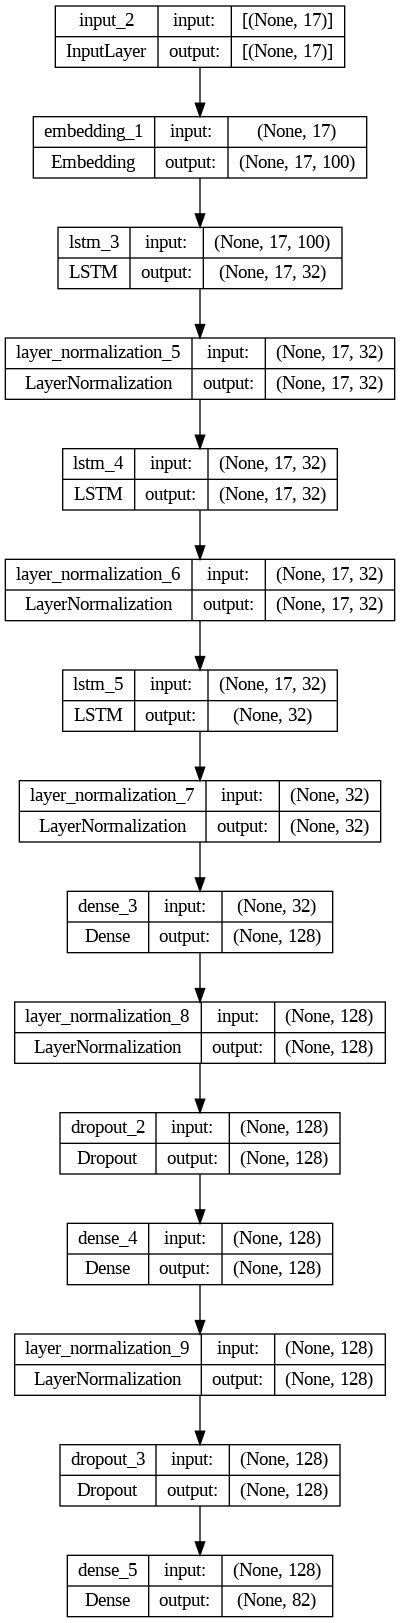

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, LayerNormalization, Dense, Dropout
from tensorflow.keras.regularizers import l2  # Import l2 regularizer from tensorflow.keras.regularizers
from tensorflow.keras.utils import plot_model
import numpy as np  # Make sure to import numpy if it's not already imported

model = Sequential()

model.add(Input(shape=(X.shape[1])))
model.add(Embedding(input_dim=vocab_size+1, output_dim=100, mask_zero=True))
model.add(LSTM(32, return_sequences=True, kernel_regularizer=l2(0.001)))
model.add(LayerNormalization())
model.add(LSTM(32, return_sequences=True, kernel_regularizer=l2(0.001)))
model.add(LayerNormalization())
model.add(LSTM(32, kernel_regularizer=l2(0.001)))
model.add(LayerNormalization())
model.add(Dense(128, activation="relu", kernel_regularizer=l2(0.001)))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu", kernel_regularizer=l2(0.001)))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(len(np.unique(y)), activation="softmax"))

model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

model.summary()
plot_model(model, show_shapes=True)

In [43]:
model_history = model.fit(x=X,  # Data input X
                          y=y,  # Data output y
                          batch_size=10,  # Ukuran batch yang digunakan dalam setiap iterasi
                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)],  # Menggunakan EarlyStopping untuk menghentikan pelatihan jika akurasi tidak meningkat setelah 3 epoch
                          # Dihentikan agar tidak terciptanya overfitting
                          epochs=50)  # Jumlah epoch (iterasi) pelatihan


Epoch 1/50
28/28 [==============================] - 1s 27ms/step - loss: 0.1446 - accuracy: 0.9891
Epoch 2/50
28/28 [==============================] - 1s 23ms/step - loss: 0.1633 - accuracy: 0.9781
Epoch 3/50
28/28 [==============================] - 1s 22ms/step - loss: 0.1585 - accuracy: 0.9818
Epoch 4/50
28/28 [==============================] - 1s 23ms/step - loss: 0.1530 - accuracy: 0.9818


In [28]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y)

# Transformasi data target menjadi angka
y_encoded = label_encoder.transform(y)

In [29]:
import re
import random

def inputan_user(pattern):
    # Preprocess input pattern
    text = []
    txt = re.sub('[^a-zA-Z\']', ' ', pattern)  # Menghapus karakter selain huruf dan tanda kutip dari pattern
    txt = txt.lower()  # Mengonversi pattern menjadi huruf kecil
    txt = txt.split()  # Membagi pattern menjadi kata-kata
    txt = " ".join(txt)  # Menggabungkan kata-kata kembali menjadi teks
    text.append(txt)  # Menambahkan teks ke dalam list

    # Tokenize and pad the input pattern
    x_test = tokenizer.texts_to_sequences(text)  # Mengonversi teks input pengguna menjadi urutan angka
    x_test = np.array(x_test).squeeze()  # Mengonversi ke dalam array dan menghapus dimensi yang tidak perlu
    x_test = pad_sequences([x_test], padding='post', maxlen=X.shape[1])  # Melakukan padding terhadap urutan angka

    # Make prediction using the model
    y_pred = model.predict(x_test)  # Memprediksi kelas dengan model yang telah dilatih
    y_pred = y_pred.argmax()  # Mengambil indeks kelas dengan nilai probabilitas tertinggi
    tag = lbl_enc.inverse_transform([y_pred])[0]  # Mengonversi indeks kelas kembali menjadi label kelas
    responses = df[df['tag'] == tag]['responses'].values[0]  # Mengambil respons berdasarkan label kelas

    # Display user input and bot response
    print("User: {}".format(pattern))
    print(" BOT : {}".format(random.choice(responses)))  # Menampilkan respons bot secara acak dari respons yang tersedia


In [30]:
inputan_user('Saya lagi depresi')

1/1 [==============================] - 3s 3s/step
User: Saya lagi depresi
 BOT : Terkadang saat kita mengalami depresi, sulit untuk memedulikan apa pun. Sulit untuk melakukan hal yang paling sederhana. Beri diri Anda waktu untuk pulih.


In [31]:
inputan_user('saya suka tiba-tiba marah')

1/1 [==============================] - 0s 23ms/step
User: saya suka tiba-tiba marah
 BOT : Senang bertemu denganmu. Jadi beritahu aku. Bagaimana perasaanmu hari ini?


In [32]:
inputan_user("bagaimana cara mengatasi saya yang suka tiba-tiba marah?")

1/1 [==============================] - 0s 23ms/step
User: bagaimana cara mengatasi saya yang suka tiba-tiba marah?
 BOT : Mengatasi perasaan putus asa bisa menjadi proses yang sulit, tetapi ada langkah-langkah yang dapat membantu. Mencari bantuan dari orang-orang yang Anda percayai, seperti teman, keluarga, atau profesional kesehatan mental, adalah langkah pertama yang penting. Berbagi perasaan Anda dengan orang lain dapat memberi Anda dukungan emosional yang dibutuhkan. Selain itu, menjaga gaya hidup yang sehat dengan pola tidur yang baik, makanan sehat, dan olahraga teratur juga dapat membantu meningkatkan kesejahteraan mental Anda. Melakukan kegiatan yang Anda nikmati dan memberi Anda kepuasan, seperti hobi atau seni, juga dapat membantu mengalihkan perhatian dari perasaan putus asa dan putus asa.


In [33]:
inputan_user("bagaimana cara mengatasi saya yang suka sendiri dan takut dengan orang lain")

1/1 [==============================] - 0s 22ms/step
User: bagaimana cara mengatasi saya yang suka sendiri dan takut dengan orang lain
 BOT : Pagi! Semangat untuk memulai hari ini.


In [34]:
inputan_user("saran untuk mengatasi kesedihan")

1/1 [==============================] - 0s 23ms/step
User: saran untuk mengatasi kesedihan
 BOT : Selamat pagi. Saya harap tidur malam Anda nyenyak. Bagaimana perasaanmu hari ini?


In [35]:
from tensorflow.keras.models import save_model

# Simpan model ke dalam file .h5
save_model(model, 'model_chatbot.h5')

<ipython-input-35-29eb873c1095>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, 'model_chatbot.h5')


In [ ]:
import re
import random

def inputan_user():
    pattern = input("You: ")  # Menerima input dari pengguna
    # Preprocess input pattern
    text = []
    txt = re.sub('[^a-zA-Z\']', ' ', pattern)  # Menghapus karakter selain huruf dan tanda kutip dari pattern
    txt = txt.lower()  # Mengonversi pattern menjadi huruf kecil
    txt = txt.split()  # Membagi pattern menjadi kata-kata
    txt = " ".join(txt)  # Menggabungkan kata-kata kembali menjadi teks
    text.append(txt)  # Menambahkan teks ke dalam list

    # Tokenize and pad the input pattern
    x_test = tokenizer.texts_to_sequences(text)  # Mengonversi teks input pengguna menjadi urutan angka
    x_test = np.array(x_test).squeeze()  # Mengonversi ke dalam array dan menghapus dimensi yang tidak perlu
    x_test = pad_sequences([x_test], padding='post', maxlen=X.shape[1])  # Melakukan padding terhadap urutan angka

    # Make prediction using the model
    y_pred = model.predict(x_test)  # Memprediksi kelas dengan model yang telah dilatih
    y_pred = y_pred.argmax()  # Mengambil indeks kelas dengan nilai probabilitas tertinggi
    tag = lbl_enc.inverse_transform([y_pred])[0]  # Mengonversi indeks kelas kembali menjadi label kelas
    responses = df[df['tag'] == tag]['responses'].values[0]  # Mengambil respons berdasarkan label kelas

    # Display user input and bot response
    print(" BOT : {}".format(random.choice(responses)))  # Menampilkan respons bot secara acak dari respons yang tersedia


# Loop untuk interaksi dengan pengguna
while True:
    inputan_user()
    if input("Continue? (y/n): ").strip().lower() != 'y':
        print('Selamat tinggal! Saya selalu ada disini untuk membantu Anda')
        break